In [1]:
import sys
sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/glycompare/')

In [17]:
import os
from importlib import reload

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import plot_glycan_utilities
import __init__
import initiator
import glycan_io

# reload(__init__)
reload(initiator)

%matplotlib inline

In [7]:
# environment parameter setting 
glycompare_root = '/Users/apple/PycharmProjects/GlyCompare/'
glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
__init__.num_processors = 4
__init__.exact_Ture = False


# project parameter
working_addr = os.path.join(glycompare_root, 'example_data', 'test_iscience')
project_name = "test_iscience"
# abd_t
complex_profile_naming = False
external_profile_naming= False

# initiator
keywords_dict = initiator.load_para_keywords(project_name, working_addr, glytoucan_db_addr=glytoucan_db_addr)
keywords_dict


{'external_profile_naming': False,
 'external_profile_naming_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/test_iscience/source_data/external_profile_naming.json',
 'glycan_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/test_iscience/intermediate_file/test_iscience_glycan_dict.json',
 'glycan_motif_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/test_iscience/intermediate_file/test_iscience_glycan_motif_dict.json',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/test_iscience/glycoct/',
 'glycoprofile_list_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/test_iscience/intermediate_file/test_iscience_glycoprofile_list.json',
 'glytoucan_db_addr': '/Users/apple/PycharmProjects/GlyCompare/glycompare/database/glytoucan_database.json',
 'intermediate_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/test_iscience/intermediate_file/',
 'matched_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/

In [8]:
reload(initiator)

initiator.check_init_dir(keywords_dict)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


In [11]:
_table = glycan_io.load_table(os.path.join(keywords_dict['source_dir'], 'abundace_table.csv'), rep='-')
# _table.replace(to_replace='-', value=0)
structure_loader = _table.columns.tolist()
data_type = 'glytoucanid'
glycan_dict = initiator.load_structure_pip(keywords_dict=keywords_dict,
                                           data_type=data_type, 
                                           structure_loader=structure_loader)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
loading glytoucan_database from  /Users/apple/PycharmProjects/GlyCompare/glycompare/database/glytoucan_database.json
adding G70073SG
adding G14576KZ
adding G88876JQ
adding G65984FE
adding G03652TR
adding G36859SD
adding G44754DF
adding G53582JE
adding G29024OJ
adding G66741YQ
adding G00998NI
adding G68318SH
adding G33685ZQ
adding G88495BI
adding G90889KG
/Users/apple/PycharmProjects/GlyCompare/example_data/test_iscience/intermediate_file/test_iscience_glycan_dict.json


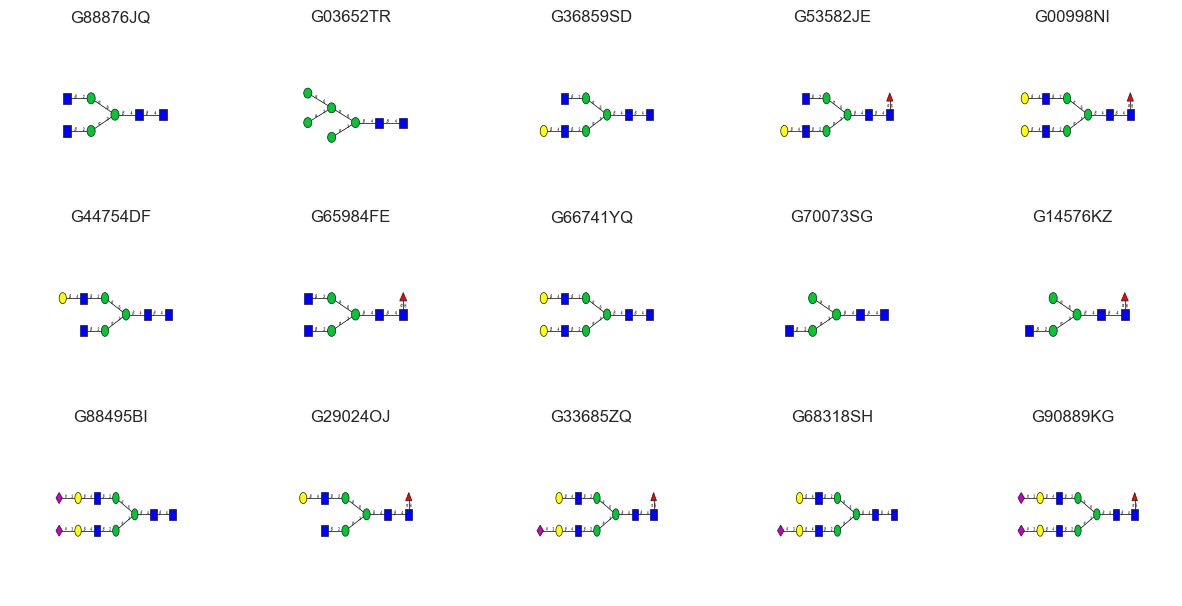

In [6]:
plot_glycan_utilities.plot_glycan_dict(glycan_dict)

In [12]:
initiator.glycan_deconvoluting_pip(keywords_dict, forced=False)

start glycan_dict
loaded existed motif_dic
start merge motif_dict
loaded merged motif_dic
finished glycan deconvolution


In [14]:
abd_table = glycan_io.load_table(os.path.join(keywords_dict['source_dir'], 'abundace_table.csv'), rep='-')
abd_table = abd_table.astype('float')
abd_table = abd_table.transpose()
abd_table.head()

,CC1D0,CC1D3,CC1D5,CC1D7,CC1D9,CC1D12,CC2D0,CC2D3,CC2D5,CC2D7,...,HD1D5,HD1D7,HD1D9,HD1D12,HD2D0,HD2D3,HD2D5,HD2D7,HD2D9,HD2D12
G70073SG,0.00,0.00,0.04,0.12,0.28,0.45,0.00,0.04,0.06,0.13,...,0.04,0.09,0.18,0.26,0.00,0.03,0.03,0.10,0.20,0.26
G14576KZ,0.00,0.25,0.31,0.39,0.54,0.98,0.00,0.22,0.32,0.41,...,0.11,0.21,0.43,0.71,0.00,0.07,0.12,0.25,0.49,0.68
G88876JQ,4.50,2.08,1.96,2.55,4.25,4.83,1.17,1.95,1.94,2.56,...,2.25,3.05,3.44,3.39,1.11,1.89,2.28,3.09,3.25,2.99
G65984FE,47.59,59.96,67.81,81.51,84.88,83.94,51.08,58.40,68.17,81.85,...,40.09,53.92,69.51,78.88,40.80,41.86,40.44,55.64,69.82,78.28
G03652TR,0.00,0.32,0.29,0.38,0.84,2.19,0.00,0.34,0.31,0.39,...,0.21,0.35,0.66,1.44,0.29,0.16,0.21,0.40,0.80,1.93


mz_list 15 profile_list 24
15 24
loaded substructure_abd_table
the glycan core is
<class 'str'>
start motif_with core
len 6
len 7
len 8
len 9
len 10
len 11
len 12
Finish the n-glycan match  21  motifs are matched to the n-glycan core
start building dependence_tree
6
7
8
9
10
11
12
Nodes dropped []
21 33


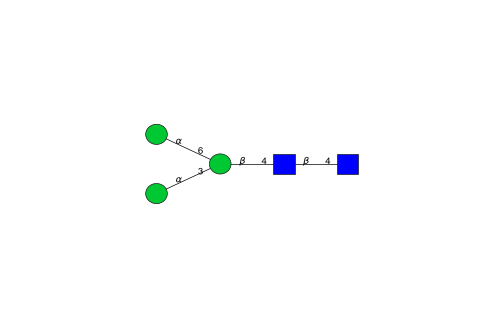

In [15]:
a_node_state = initiator.glyco_vector_pip(keywords_dict, 
                                          abd_table,
                                          external_profile_naming=False, 
                                          simple_naming=True, 
                                          simple_profile=True, 
                                          forced=False)

_a.nodes 21
merged_weights_dict 21
After first drop 0 + 21 =  21 21
_temp_dropping_list 3 3
3 + 18 =  21 20.999999999999996
mod_nodes 18
mod_edges 23


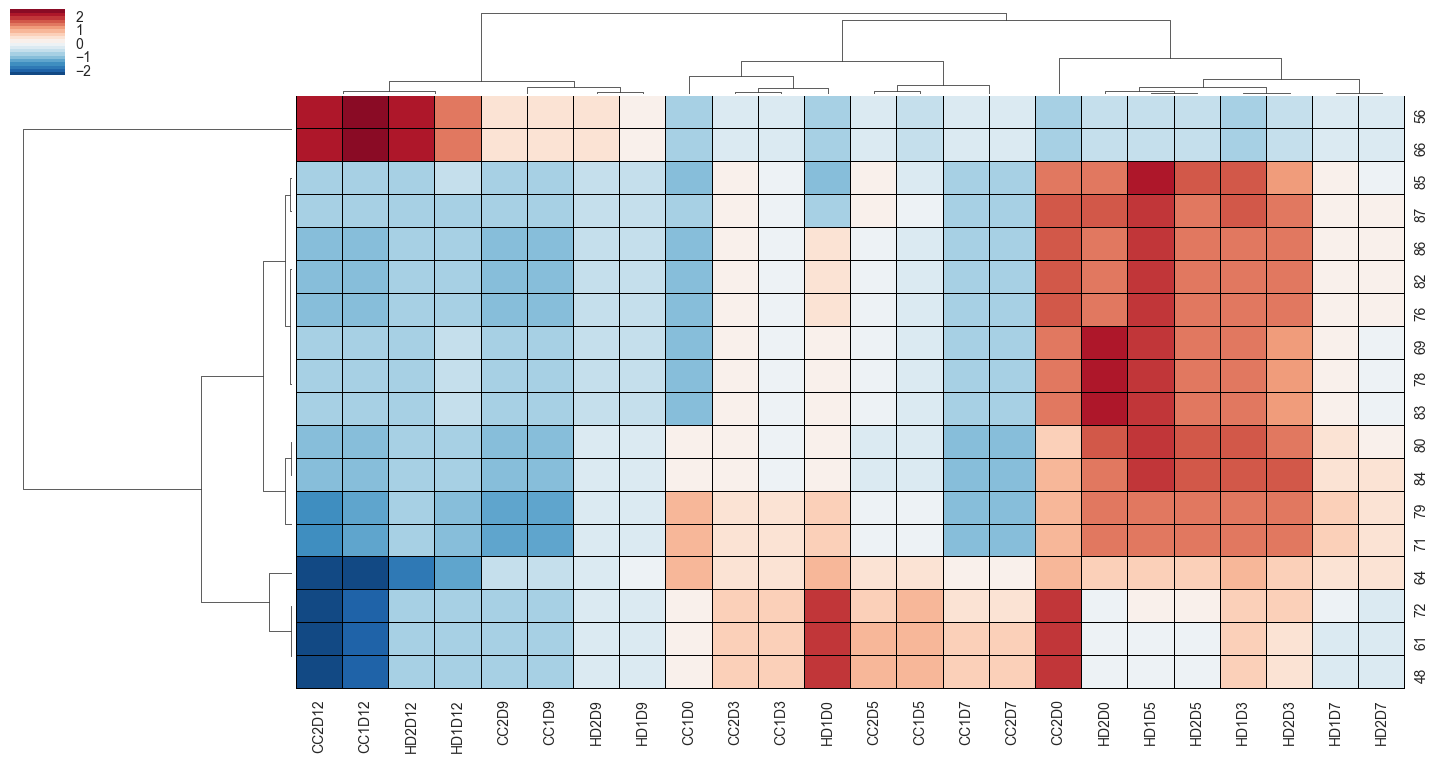

In [21]:
# a_node_state
substructure_abd_table_addr = keywords_dict['substructure_abd_table_addr']
motif_abd_table_addr = keywords_dict['motif_abd_table_addr']

node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = a_node_state.nodes_dropping_pipe(
    drop_diff_abund=True)
# _collapsed_edge, _collapsed_node, _collapsed_dege_attri = _a.collapsing_potential_node()
substructure_abd_table = pd.read_csv(substructure_abd_table_addr, index_col=0)
_table_using = substructure_abd_table[substructure_abd_table.index.isin(mod_nodes)]
_table_using.to_csv(motif_abd_table_addr)
g = sns.clustermap(_table_using, metric="correlation", cmap=sns.color_palette("RdBu_r", 20), z_score=0,
                   linewidths=0.01, figsize=(18, 9), linecolor='black', method='complete', )
raw_abd_zscore_plot_addr = keywords_dict['raw_abd_zscore_plot_addr']
plt.savefig(raw_abd_zscore_plot_addr)